<a href="https://colab.research.google.com/github/bommojuvishu/stocksgraphcomp/blob/main/stock_graph_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing the stocks that are max linear graphs**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import datetime
import os
import traceback
import matplotlib.pyplot as plt
import json
import logging 



In [ ]:
def min_max(data):
  max_x = max(data)
  min_x = min(data)
  result = []
  for x in data:
    x = x - min_x
    result.append(x/ (max_x - min_x))
    
  return result

def plotgraph(df , colname):
  plt.figure(figsize=(9,4))
  plt.plot(df.index, df[colname])
  plt.show()

def createList(df):
  interval = 1/(len(df))
  result =np.arange(0, 1, interval)

  if len(result) != len(df):
    lastElementIndex = len(result)-1
    result = result[:lastElementIndex]

  return result

def computeCloud (data):
    if data.Close > data.MovingAVG:
        return 1
    
    return 0

def returnpercent(arr , nodays ):
  result ={}
  TODAY = dt.datetime.today().strftime('%Y-%m-%d')
  datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')
  for name in arr:
    ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(nodays),datetime_object)
    openprice = ohlcv.iloc[0]['Open']
    closeprice = ohlcv.iloc[len(ohlcv) -1 ]['Close']
    x = closeprice -openprice
    perrtr = (x/openprice) *100
    result[name] = perrtr
  print(result)

  return sum(result.values())


In [ ]:
#nifty 50
liststocks =["HINDALCO","JSWSTEEL","CIPLA","INFY","TATASTEEL","NESTLEIND","APOLLOHOSP","DRREDDY","DIVISLAB","WIPRO","ULTRACEMCO","SUNPHARMA","ASIANPAINT","HCLTECH","TECHM","ADANIPORTS","LT","UPL","ITC","BAJFINANCE","TCS","HDFCBANK","ONGC","TATAMOTORS","GRASIM","HEROMOTOCO","EICHERMOT","BAJAJFINSV","BPCL","HINDUNILVR","INDUSINDBK","HDFCLIFE","AXISBANK","M&M","HDFC","ICICIBANK","BAJAJ-AUTO","BRITANNIA","SHREECEM","TITAN","POWERGRID","SBILIFE","KOTAKBANK","BHARTIARTL","MARUTI","RELIANCE","SBIN","COALINDIA","NTPC","TATACONSUM"]

In [ ]:
#nifty 500
liststocks = ["3MINDIA","ABB","ACC","AIAENG","APLAPOLLO","AUBANK","AARTIDRUGS","AARTIIND","AAVAS","ABBOTINDIA","ADANIENT","ADANIGREEN","ADANIPORTS","ATGL","ADANITRANS","ABCAPITAL","ABFRL","ADVENZYMES","AEGISCHEM","AFFLE","AJANTPHARM","ALEMBICLTD","APLLTD","ALKEM","ALKYLAMINE","ALOKINDS","AMARAJABAT","AMBER","AMBUJACEM","ANGELONE","ANURAS","APOLLOHOSP","APOLLOTYRE","ASAHIINDIA","ASHOKLEY","ASHOKA","ASIANPAINT","ASTERDM","ASTRAZEN","ASTRAL","ATUL","AUROPHARMA","AVANTIFEED","DMART","AXISBANK","BASF","BEML","BSE","BAJAJ-AUTO","BAJAJCON","BAJAJELEC","BAJFINANCE","BAJAJFINSV","BAJAJHLDNG","BALAMINES","BALKRISIND","BALRAMCHIN","BANDHANBNK","BANKBARODA","BANKINDIA","MAHABANK","BATAINDIA","BAYERCROP","BERGEPAINT","BDL","BEL","BHARATFORG","BHEL","BPCL","BHARATRAS","BHARTIARTL","BIOCON","BIRLACORPN","BSOFT","BLUEDART","BLUESTARCO","BBTC","BOSCHLTD","BRIGADE","BRITANNIA","CCL","CESC","CGPOWER","CRISIL","CSBBANK","CADILAHC","CANFINHOME","CANBK","CAPLIPOINT","CGCL","CARBORUNIV","CASTROLIND","CEATLTD","CENTRALBK","CDSL","CENTURYPLY","CENTURYTEX","CERA","CHALET","CHAMBLFERT","CHOLAHLDNG","CHOLAFIN","CIPLA","CUB","COALINDIA","COCHINSHIP","COFORGE","COLPAL","CAMS","CONCOR","COROMANDEL","CREDITACC","CROMPTON","CUMMINSIND","CYIENT","DCBBANK","DCMSHRIRAM","DLF","DABUR","DALBHARAT","DEEPAKNTR","DELTACORP","DHANI","DHANUKA","DBL","DIVISLAB","DIXON","LALPATHLAB","DRREDDY","EIDPARRY","EIHOTEL","EPL","EDELWEISS","EICHERMOT","ELGIEQUIP","EMAMILTD","ENDURANCE","ENGINERSIN","EQUITAS","EQUITASBNK","ERIS","ESCORTS","EXIDEIND","FDC","FEDERALBNK","FACT","FINEORG","FINCABLES","FINPIPE","FSL","FORTIS","FRETAIL","GAIL","GMMPFAUDLR","GALAXYSURF","GARFIBRES","GICRE","GILLETTE","GLAND","GLAXO","GLENMARK","GODFRYPHLP","GODREJAGRO","GODREJCP","GODREJIND","GODREJPROP","GRANULES","GRAPHITE","GRASIM","GESHIP","GREAVESCOT","GRINDWELL","GUJALKALI","GAEL","FLUOROCHEM","GUJGASLTD","GNFC","GPPL","GSFC","GSPL","HEG","HCLTECH","HDFCAMC","HDFCBANK","HDFCLIFE","HFCL","HAPPSTMNDS","HATHWAY","HATSUN","HAVELLS","HEIDELBERG","HEMIPROP","HEROMOTOCO","HIKAL","HINDALCO","HGS","HAL","HINDCOPPER","HINDPETRO","HINDUNILVR","HINDZINC","POWERINDIA","HOMEFIRST","HONAUT","HUDCO","HDFC","ICICIBANK","ICICIGI","ICICIPRULI","ISEC","IDBI","IDFCFIRSTB","IDFC","IFBIND","IIFL","IIFLWAM","IOLCP","IRB","IRCON","ITC","ITI","INDIACEM","IBULHSGFIN","IBREALEST","INDIAMART","INDIANB","IEX","INDHOTEL","IOC","IOB","IRCTC","IRFC","INDIGOPNTS","ICIL","INDOCO","IGL","INDUSTOWER","INDUSINDBK","INFIBEAM","NAUKRI","INFY","INGERRAND","INOXLEISUR","INTELLECT","INDIGO","IPCALAB","JBCHEPHARM","JKCEMENT","JKLAKSHMI","JKPAPER","JKTYRE","JMFINANCIL","JSWENERGY","JSWSTEEL","JAMNAAUTO","JINDALSAW","JSLHISAR","JSL","JINDALSTEL","JCHAC","JUBLFOOD","JUBLINGREA","JUBLPHARMA","JUSTDIAL","JYOTHYLAB","KPRMILL","KEI","KNRCON","KPITTECH","KRBL","KSB","KAJARIACER","KALPATPOWR","KALYANKJIL","KANSAINER","KARURVYSYA","KSCL","KEC","KOTAKBANK","L&TFH","LTTS","LICHSGFIN","LAOPALA","LAXMIMACH","LTI","LT","LAURUSLABS","LXCHEM","LEMONTREE","LINDEINDIA","LUPIN","LUXIND","MMTC","MOIL","MRF","LODHA","MGL","M&MFIN","M&M","MAHINDCIE","MHRIL","MAHLOG","MANAPPURAM","MRPL","MARICO","MARUTI","MASTEK","MFSL","MAXHEALTH","MAZDOCK","METROPOLIS","MINDTREE","MINDACORP","MINDAIND","MIDHANI","MOTILALOFS","MPHASIS","MCX","MUTHOOTFIN","NATCOPHARM","NBCC","NCC","NESCO","NHPC","NLCINDIA","NMDC","NOCIL","NTPC","NH","NATIONALUM","NFL","NAVINFLUOR","NAZARA","NESTLEIND","NETWORK18","NILKAMAL","NAM-INDIA","OBEROIRLTY","ONGC","OIL","OFSS","ORIENTELEC","PCBL","PIIND","PNBHOUSING","PNCINFRA","PVR","PAGEIND","PERSISTENT","PETRONET","PFIZER","PHOENIXLTD","PIDILITIND","PEL","POLYMED","POLYCAB","POLYPLEX","POONAWALLA","PFC","POWERGRID","PRAJIND","PRESTIGE","PRINCEPIPE","PRSMJOHNSN","PGHL","PGHH","PNB","QUESS","RBLBANK","RECLTD","RHIM","RITES","RADICO","RVNL","RAILTEL","RAIN","RAJESHEXPO","RALLIS","RCF","RATNAMANI","REDINGTON","RELAXO","RELIANCE","RBA","ROSSARI","ROUTE","SBICARD","SBILIFE","SIS","SJVN","SKFINDIA","SRF","SANOFI","SCHAEFFLER","SCHNEIDER","SEQUENT","SHARDACROP","SFL","SHILPAMED","SCI","SHREECEM","SHRIRAMCIT","SRTRANSFIN","SIEMENS","SOBHA","SOLARINDS","SOLARA","SONACOMS","SONATSOFTW","SPANDANA","SPICEJET","STARCEMENT","SBIN","SAIL","SWSOLAR","STLTECH","STAR","SUDARSCHEM","SUMICHEM","SPARC","SUNPHARMA","SUNTV","SUNDARMFIN","SUNDRMFAST","SUNTECK","SUPRAJIT","SUPREMEIND","SUPPETRO","SUVENPHAR","SUZLON","SYMPHONY","SYNGENE","TCIEXP","TCNSBRANDS","TTKPRESTIG","TV18BRDCST","TVSMOTOR","TANLA","TASTYBITE","TATACHEM","TATACOFFEE","TATACOMM","TCS","TATACONSUM","TATAELXSI","TATAMTRDVR","TATAMOTORS","TATAPOWER","TATASTLLP","TATASTEEL","TTML","TEAMLEASE","TECHM","NIACL","RAMCOCEM","THERMAX","THYROCARE","TIMKEN","TITAN","TORNTPHARM","TORNTPOWER","TRENT","TRIDENT","TRITURBINE","TIINDIA","UCOBANK","UFLEX","UPL","UTIAMC","UJJIVAN","UJJIVANSFB","ULTRACEMCO","UNIONBANK","UBL","MCDOWELL-N","VGUARD","VMART","VIPIND","VAIBHAVGBL","VAKRANGEE","VALIANTORG","VTL","VARROC","VBL","VEDL","VENKEYS","VINATIORGA","IDEA","VOLTAS","WABCOINDIA","WELCORP","WELSPUNIND","WESTLIFE","WHIRLPOOL","WIPRO","WOCKPHARMA","YESBANK","ZEEL","ZENSARTECH","ZYDUSWELL","ECLERX"]

In [ ]:
# liststocks = ['PERSISTENT','INFY','M&M','VBL']
# liststocks = ["DRREDDY","ITC","TECHM","BPCL","ULTRACEMCO","SUNPHARMA","WIPRO","BRITANNIA","INFY","HCLTECH","UPL","NESTLEIND","CIPLA","HDFCBANK","TCS","SBIN","IOC","SHREECEM","ADANIPORTS","INDUSINDBK","NTPC","BAJAJ-AUTO","ICICIBANK","DIVISLAB","HDFCLIFE","POWERGRID","GRASIM","TATASTEEL","RELIANCE","SBILIFE","KOTAKBANK","LT","HDFC","BAJAJFINSV","TATACONSUM","BHARTIARTL","ONGC","EICHERMOT","BAJFINANCE","AXISBANK","HINDALCO","HINDUNILVR","JSWSTEEL","COALINDIA","M&M","TATAMOTORS","HEROMOTOCO","ASIANPAINT","MARUTI","TITAN"]
tickers={}

daterange = 7
periodinput = 365
TODAY = "2022-08-10"
TODAY = dt.datetime.today().strftime('%Y-%m-%d')
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')

count=0
for name in liststocks: 
    try:
        finalresult = []
        count = count +1
        i=0
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
    
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        print(count,"MATCH:",len(ohlcv), len(createList(ohlcv)))
        ohlcv['expected'] = createList(ohlcv)
        # ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) if x['expected'] > x['minmax']  else 0 , axis=1)
        ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) , axis=1)
        ohlcv['result'] = ohlcv['result'].abs()
 
        # sumofpos = ohlcv[ohlcv['result']>0].sum()
     
        print(name )
        finalresult.append(sum(ohlcv['result']))
   

        tickers[name] = finalresult
    
    except Exception as ex:
        print(ex)#raised if `y` is empty.
        print("ERROR: ", name)
        liststocks.remove(name)
        traceback.print_exc()
        

df=pd.DataFrame.from_dict(tickers,orient='index')
df = df.reset_index()
df

In [ ]:
df.sort_values(by=[0])

,index,0
239,INGERRAND,26.298674
96,CHALET,26.358471
172,FLUOROCHEM,28.054868
310,MINDACORP,30.652322
451,THERMAX,30.696999
...,...,...
433,TANLA,NaN
458,TRIDENT,NaN
462,UFLEX,NaN
472,VMART,NaN


[*********************100%***********************]  1 of 1 completed
INGERRAND


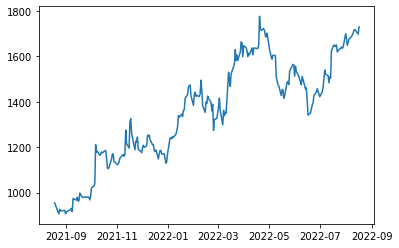

[*********************100%***********************]  1 of 1 completed
CHALET


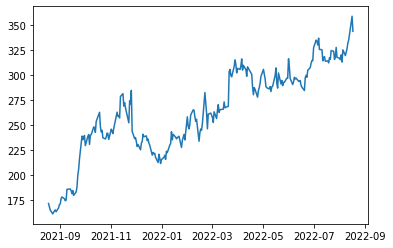

[*********************100%***********************]  1 of 1 completed
FLUOROCHEM


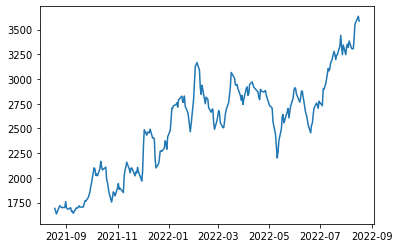

[*********************100%***********************]  1 of 1 completed
MINDACORP


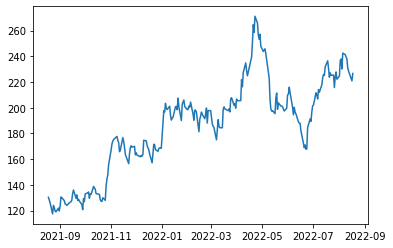

[*********************100%***********************]  1 of 1 completed
THERMAX


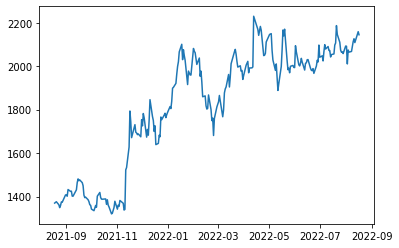

[*********************100%***********************]  1 of 1 completed
INDHOTEL


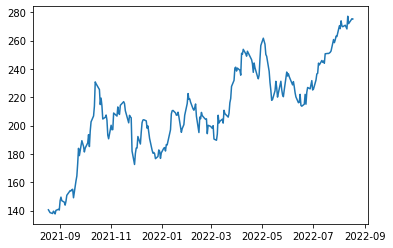

[*********************100%***********************]  1 of 1 completed
ATGL


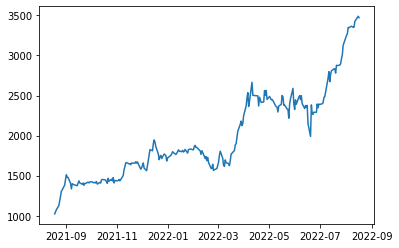

[*********************100%***********************]  1 of 1 completed
POWERINDIA


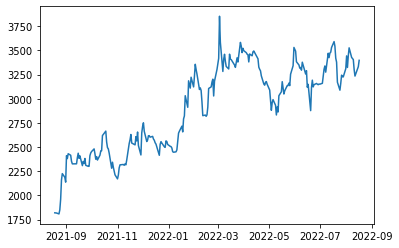

[*********************100%***********************]  1 of 1 completed
INOXLEISUR


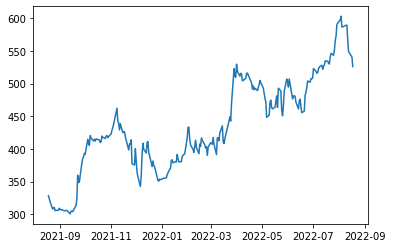

[*********************100%***********************]  1 of 1 completed
LEMONTREE


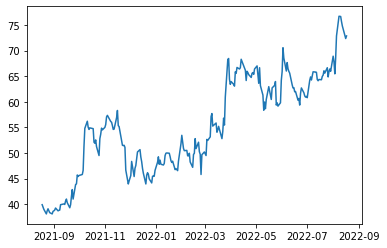

In [ ]:
top10 = df.sort_values(by=[0]).head(10)
topnames = top10['index'].values

for name in topnames: 
    try:
        result = []
        i=0     
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        
        ohlcv['expected'] =  createList(ohlcv)

        ohlcv['result'] = ohlcv.apply(lambda x: (x['minmax'] - x['expected'] ) , axis=1)
        print(name)
        colname = 'Close'
        plotgraph(ohlcv, colname)
        # colname = 'expected'
        # plotgraph(ohlcv, colname)
        
    
    except Exception as ex:
        print(ex)#raised if  is empty.
        print("ERROR: ", name)
   
        traceback.print_exc()

In [ ]:
print(topnames)
returnpercent(topnames, daterange)

['INGERRAND' 'CHALET' 'FLUOROCHEM' 'MINDACORP' 'THERMAX' 'INDHOTEL' 'ATGL'
 'POWERINDIA' 'INOXLEISUR' 'LEMONTREE']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'INGERRAND': 1.6328956727239354, 'CHALET': 5.506973774264493, 'FLUOROCHEM': 7.894732202038024, 'MINDACORP': -5.738047006967905, 'THERMAX': 0.9247345554439185, 'INDHOTEL': 1.5870040964172962, 'AT

-2.266546111939995